# Examen Final

<center>
<img src="https://www.ctic.uni.edu.pe/wp-content/uploads/2020/05/logo-ctic-footer.png" >
</center></br>

<span style="color:cyan; font-size:1.5em; font-family:Papyrus"> 
<b>Nombre:</b>  Joel Angel David Barrantes Palacios</br>
<b>Especialización:</b>  Programa de Especialización Machine Learning</br>
</span> 

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
import feather


In [34]:
df = pd.read_feather('./data/peruvian_enterprise_list.feather')
df.head()

,Unnamed: 0,RAZÓN SOCIAL,RUC/DNI,SECTOR ECONÓMICO,NOMBRE DE ENTIDAD OTORGANTE DEL CRÉDITO,NOMBRE DE 2DA. ENTIDAD OTORGANTE DEL CRÉDITO*,MONTO PRÉSTAMO (S/),MONTO COBERTURADO (S/),DEPARTAMENTO
0,1.0,_x001A_USTA SAGRADA SAC,20553879150.0,HOTELES Y RESTAURANTES,0011 - BANCO BBVA PERU,nan,482080.0,457976.0,LIMA
1,2.0,2L SOLUCIONES S.A.C.,20524693250.0,"ACTIV. INMOBILIARIAS, EMPRESARIALES ALQ.",0002 - CRÉDITO,nan,124896.0,118651.2,LIMA
2,3.0,3P INVERSIONES S.A.C.,20551286348.0,COMERCIO,0002 - CRÉDITO,nan,106577.0,101248.15,LIMA
3,4.0,A & G MISTI CONSTRUCTORESS.A.C,20542311488.0,MINERIA,0002 - CRÉDITO,nan,104066.0,98862.7,SAN MARTIN
4,5.0,A Y N CALZADOS S.A.C.,20601959217.0,INDUSTRIA MANUFACTURERA,0002 - CRÉDITO,nan,90677.0,86143.15,LIMA


## Sobre la Data:
* RAZÓN SOCIAL: Nombre con que una entidad o sociedad mercantil está registrada legalmente.
* RUC: El Registro Único de Contribuyentes, es un registro que identifica a las empresas dentro de algún país.
* SECTOR ECONÓMICO: actividad económica de un Estado o territorio en los sectores primario, secundario, terciario , cuaternarios.
* ENTIDAD OTORGANTE DEL CRÉDITO: Son empresas que han accedido a créditos destinados a financiar actividades de producción, comercialización o prestación de servicios.
* MONTO PRÉSTAMO: Crédito otorgado a la entidad solicitante del prestamo.
* MONTO COBERTURADO: equivalente a 1 mes de ventas promedio mensual del año 2019, o 3 veces la aportación a EsSalud declarada por la empresa en el año 2019.

## Aplicando ETL en la base de datos

In [35]:
df.isna().sum()

Unnamed: 0                                       3
RAZÓN SOCIAL                                     0
RUC/DNI                                          0
SECTOR ECONÓMICO                                 0
NOMBRE DE ENTIDAD OTORGANTE DEL CRÉDITO          0
NOMBRE DE 2DA. ENTIDAD OTORGANTE DEL CRÉDITO*    0
MONTO PRÉSTAMO (S/)                              0
MONTO COBERTURADO (S/)                           0
DEPARTAMENTO                                     0
dtype: int64

In [36]:
df.rename(columns={'Unnamed: 0':'index'}, inplace=True)
df.dropna(inplace=True)
df['MONTO PRÉSTAMO (S/)'] = df['MONTO PRÉSTAMO (S/)'].astype(float).round(2)
df['MONTO COBERTURADO (S/)'] = df['MONTO COBERTURADO (S/)'].astype(float).round(2)
if 'index' in df.columns:
    df['index'] = df['index'].astype(int)
    df.set_index('index', inplace=True)

In [37]:
df.isna().sum()

index                                            0
RAZÓN SOCIAL                                     0
RUC/DNI                                          0
SECTOR ECONÓMICO                                 0
NOMBRE DE ENTIDAD OTORGANTE DEL CRÉDITO          0
NOMBRE DE 2DA. ENTIDAD OTORGANTE DEL CRÉDITO*    0
MONTO PRÉSTAMO (S/)                              0
MONTO COBERTURADO (S/)                           0
DEPARTAMENTO                                     0
dtype: int64

In [50]:
df.sample(3)

,RAZÓN SOCIAL,RUC/DNI,SECTOR ECONÓMICO,NOMBRE DE ENTIDAD OTORGANTE DEL CRÉDITO,NOMBRE DE 2DA. ENTIDAD OTORGANTE DEL CRÉDITO*,MONTO PRÉSTAMO (S/),MONTO COBERTURADO (S/),DEPARTAMENTO
index,,,,,,,,
1869,ABANTO PONGO FERMIN,10032415925.0,COMERCIO,0043 - FINANCIERA CREDISCOTIA,nan,10500.0,10290.0,AMAZONAS
314021,MULLISACA GUEVARA LIZBED MILLY,71639734.0,"AGRICULTUR, GANADERIA, CAZA Y SILVICULT",0813 - CMAC TACNA,nan,3000.0,2940.0,AREQUIPA
210814,HUAMAN ESTEBAN EVERARDO ODAR,42862727.0,"ACTIV. INMOBILIARIAS, EMPRESARIALES ALQ.",0808 - CMAC DE HUANCAYO,nan,21000.0,20580.0,LIMA


## Pregunta 1

* Realice un diagrama de barras para observar como se distribuyo el fondo del proyecto en los diferentes rubros
del mercado (columna : SECTOR ECONÓMICO).

In [59]:
print("""
Distribucion de numero de prestamos por Sector Economico""")
df['SECTOR ECONÓMICO'].value_counts().to_frame()


Distribucion de numero de prestamos por Sector Economico


COMERCIO                                    237995
TRANSPORTE, ALMACENAMIENTO Y COMUNIC.        59661
INDUSTRIA MANUFACTURERA                      48576
ACTIV. INMOBILIARIAS, EMPRESARIALES ALQ.     40003
OTROS SERVICIOS                              27441
CONSTRUCCION                                 27117
HOTELES Y RESTAURANTES                       24567
AGRICULTUR, GANADERIA, CAZA Y SILVICULT      21797
SERVICIOS SOCIALES Y DE SALUD                 5342
ENSEÑANZA                                     3094
PESCA                                         2942
MINERIA                                       1350
ELECTRICIDAD, GAS Y AGUA                       717
INTERMEDIACION FINANCIERA                      696
Name: SECTOR ECONÓMICO, dtype: int64

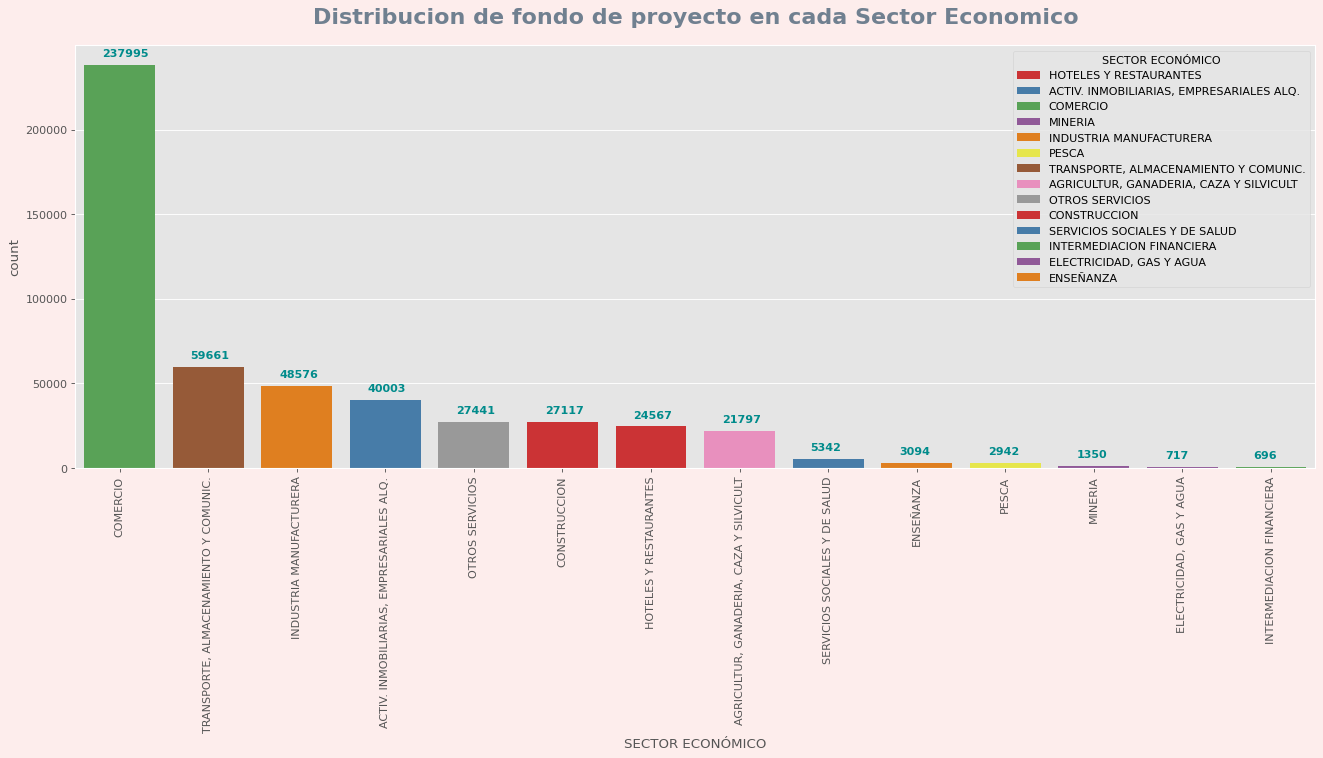

In [95]:
economic_sector = ['COMERCIO',
 'TRANSPORTE, ALMACENAMIENTO Y COMUNIC.',
 'INDUSTRIA MANUFACTURERA',
 'ACTIV. INMOBILIARIAS, EMPRESARIALES ALQ.',
 'OTROS SERVICIOS',
 'CONSTRUCCION',
 'HOTELES Y RESTAURANTES',
 'AGRICULTUR, GANADERIA, CAZA Y SILVICULT',
 'SERVICIOS SOCIALES Y DE SALUD',
 'ENSEÑANZA',
 'PESCA',
 'MINERIA',
 'ELECTRICIDAD, GAS Y AGUA',
 'INTERMEDIACION FINANCIERA']

fig = plt.figure(figsize=(20,7), facecolor = '#FDEDEC', edgecolor = '#FDEDEC', dpi=80)
plt.style.use('ggplot')
# bar graph with matplotlib 
sns.countplot(x='SECTOR ECONÓMICO', data=df, hue='SECTOR ECONÓMICO',palette='Set1', capsize=.2, dodge=False, order=economic_sector)
# sns.barplot(
#     x='SECTOR ECONÓMICO', 
#     y= 'MONTO PRÉSTAMO (S/)', 
#     hue= 'SECTOR ECONÓMICO',
#     data=df, capsize=.2, 
#     dodge=False, 
#     order=True)
plt.title('Distribucion de fondo de proyecto en cada Sector Economico', fontsize=20, color="slategrey", 
fontweight="bold", y=1.05, x=0.5, horizontalalignment="center", verticalalignment="center") 
plt.xticks(rotation=90)
plt.MaxNLocator(nbins=14, prune='lower', min_n_ticks=2, integer=True)

xlocs, xlabs = plt.xticks()
y = [237995,59661,48576,40003,27441,27117,24567,21797,5342,3094,2942,1350,717,696]

xlocs=[i for i in range(14)]
for i, v in enumerate(y):
    plt.text(xlocs[i] - 0.2, v + 5000, str(v), color='darkcyan', fontweight='bold')
plt.show()

In [96]:

loan_amount = df.groupby('SECTOR ECONÓMICO')['MONTO PRÉSTAMO (S/)'].sum().sort_values(ascending=False).to_frame()
loan_amount.reset_index(inplace=True)
loan_amount

,SECTOR ECONÓMICO,MONTO PRÉSTAMO (S/)
0,COMERCIO,2.276485e+10
1,INDUSTRIA MANUFACTURERA,8.499674e+09
2,"ACTIV. INMOBILIARIAS, EMPRESARIALES ALQ.",6.996487e+09
3,"TRANSPORTE, ALMACENAMIENTO Y COMUNIC.",6.061192e+09
4,CONSTRUCCION,2.766270e+09
5,OTROS SERVICIOS,2.732737e+09
6,"AGRICULTUR, GANADERIA, CAZA Y SILVICULT",2.625267e+09
7,HOTELES Y RESTAURANTES,1.734407e+09
8,SERVICIOS SOCIALES Y DE SALUD,9.225031e+08
9,ENSEÑANZA,9.109740e+08


**Resultados:**
* 

**Conclusiones:**
* 

* Muestre mediante un diagrama de barras el total de monto prestado (columna : MONTO PRÉSTAMO (S/)) 
por cada entidad otorgante (columna : NOMBRE DE ENTIDAD OTORGANTE DEL CRÉDITO)

In [ ]:
economic_sector = ['COMERCIO',
 'TRANSPORTE, ALMACENAMIENTO Y COMUNIC.',
 'INDUSTRIA MANUFACTURERA',
 'ACTIV. INMOBILIARIAS, EMPRESARIALES ALQ.',
 'OTROS SERVICIOS',
 'CONSTRUCCION',
 'HOTELES Y RESTAURANTES',
 'AGRICULTUR, GANADERIA, CAZA Y SILVICULT',
 'SERVICIOS SOCIALES Y DE SALUD',
 'ENSEÑANZA',
 'PESCA',
 'MINERIA',
 'ELECTRICIDAD, GAS Y AGUA',
 'INTERMEDIACION FINANCIERA']

fig = plt.figure(figsize=(20,7), facecolor = '#FDEDEC', edgecolor = '#FDEDEC', dpi=80)
plt.style.use('ggplot')
# bar graph with matplotlib 
sns.countplot(x='SECTOR ECONÓMICO', data=df, hue='SECTOR ECONÓMICO',palette='Set1', capsize=.2, dodge=False, order=economic_sector)
# sns.barplot(
#     x='SECTOR ECONÓMICO', 
#     y= 'MONTO PRÉSTAMO (S/)', 
#     hue= 'SECTOR ECONÓMICO',
#     data=df, capsize=.2, 
#     dodge=False, 
#     order=True)
plt.title('Distribucion de fondo de proyecto en cada Sector Economico', fontsize=20, color="slategrey", 
fontweight="bold", y=1.05, x=0.5, horizontalalignment="center", verticalalignment="center") 
plt.xticks(rotation=90)
plt.MaxNLocator(nbins=14, prune='lower', min_n_ticks=2, integer=True)

xlocs, xlabs = plt.xticks()
y = [237995,59661,48576,40003,27441,27117,24567,21797,5342,3094,2942,1350,717,696]

xlocs=[i for i in range(14)]
for i, v in enumerate(y):
    plt.text(xlocs[i] - 0.2, v + 5000, str(v), color='darkcyan', fontweight='bold')
plt.show()

* Muestre mediante un diagrama de barras el total de monto prestado (columna : MONTO PRÉSTAMO (S/)) 
para cada departamento (columna : DEPARTAMENTO)

<AxesSubplot:xlabel='DEPARTAMENTO', ylabel='MONTO PRÉSTAMO (S/)'>

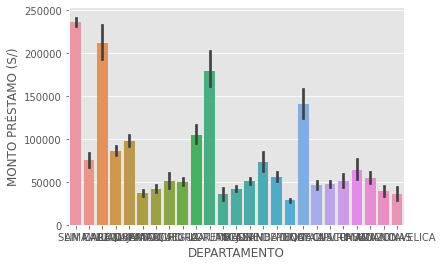

In [100]:
sns.barplot(
    x='DEPARTAMENTO', 
    y= 'MONTO PRÉSTAMO (S/)',
    data=df)

In [98]:
fig = plt.figure(figsize=(20,7), facecolor = '#FDEDEC', edgecolor = '#FDEDEC', dpi=80)
plt.style.use('ggplot')
sns.barplot(
    x='DEPARTAMENTO', 
    y= 'MONTO PRÉSTAMO (S/)', 
    hue= 'SECTOR ECONÓMICO',
    data=df, capsize=.2, 
    dodge=False, 
    order=True)
# plt.title('Distribucion de fondo de proyecto en cada Sector Economico', fontsize=20, color="slategrey", 
# fontweight="bold", y=1.05, x=0.5, horizontalalignment="center", verticalalignment="center") 
plt.xticks(rotation=90)
plt.show()

TypeError: 'bool' object is not iterable

<Figure size 1600x560 with 0 Axes>

* Realice un histograma para la columna MONTO COBERTURADO (S/) para cada uno de los departamentos

In [ ]:
economic_sector = ['COMERCIO',
 'TRANSPORTE, ALMACENAMIENTO Y COMUNIC.',
 'INDUSTRIA MANUFACTURERA',
 'ACTIV. INMOBILIARIAS, EMPRESARIALES ALQ.',
 'OTROS SERVICIOS',
 'CONSTRUCCION',
 'HOTELES Y RESTAURANTES',
 'AGRICULTUR, GANADERIA, CAZA Y SILVICULT',
 'SERVICIOS SOCIALES Y DE SALUD',
 'ENSEÑANZA',
 'PESCA',
 'MINERIA',
 'ELECTRICIDAD, GAS Y AGUA',
 'INTERMEDIACION FINANCIERA']

fig = plt.figure(figsize=(20,7), facecolor = '#FDEDEC', edgecolor = '#FDEDEC', dpi=80)
plt.style.use('ggplot')
# bar graph with matplotlib 
sns.countplot(x='SECTOR ECONÓMICO', data=df, hue='SECTOR ECONÓMICO',palette='Set1', capsize=.2, dodge=False, order=economic_sector)
# sns.barplot(
#     x='SECTOR ECONÓMICO', 
#     y= 'MONTO PRÉSTAMO (S/)', 
#     hue= 'SECTOR ECONÓMICO',
#     data=df, capsize=.2, 
#     dodge=False, 
#     order=True)
plt.title('Distribucion de fondo de proyecto en cada Sector Economico', fontsize=20, color="slategrey", 
fontweight="bold", y=1.05, x=0.5, horizontalalignment="center", verticalalignment="center") 
plt.xticks(rotation=90)
plt.MaxNLocator(nbins=14, prune='lower', min_n_ticks=2, integer=True)

xlocs, xlabs = plt.xticks()
y = [237995,59661,48576,40003,27441,27117,24567,21797,5342,3094,2942,1350,717,696]

xlocs=[i for i in range(14)]
for i, v in enumerate(y):
    plt.text(xlocs[i] - 0.2, v + 5000, str(v), color='darkcyan', fontweight='bold')
plt.show()